In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.discriminant_analysis import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from pyearth import Earth
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.simplefilter('ignore')

In [2]:
#Đọc file
df = pd.read_csv('cars_dataset.csv', delimiter=',')
# Hiển thị dữ liệu 5 dòng đầu tiên
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


In [3]:
# Đổi tên cột 'make' thành 'brands'
df.rename(columns={'Make': 'Brands'}, inplace=True)

# Lưu DataFrame đã được thay đổi vào file CSV
df.to_csv('cars_dataset.csv', index=False)
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


In [4]:
# Kiểm tra xem cột 'brands' có tồn tại trong DataFrame hay không
if 'Brands' in df.columns:
    # Chuyển tất cả các dữ liệu trong cột 'brands' thành viết hoa chữ cái đầu
    df['Brands'] = df['Brands'].str.title()

    # Lưu DataFrame đã được thay đổi vào file CSV
    df.to_csv('cars_dataset.csv', index=False)
    print("Đã chuyển các dữ liệu trong cột 'brands' thành viết hoa chữ cái đầu và lưu vào file CSV.")
else:
    print("Không tìm thấy cột 'brands' trong DataFrame.")

Đã chuyển các dữ liệu trong cột 'brands' thành viết hoa chữ cái đầu và lưu vào file CSV.


In [5]:
# Kiểm tra thông tin cơ bản về dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66482 entries, 0 to 66481
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         66482 non-null  object 
 1   year          66482 non-null  int64  
 2   price         66482 non-null  int64  
 3   transmission  66482 non-null  object 
 4   mileage       66482 non-null  int64  
 5   fuelType      66482 non-null  object 
 6   tax           66482 non-null  float64
 7   mpg           66482 non-null  float64
 8   engineSize    66482 non-null  float64
 9   Brands        66482 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.1+ MB


In [6]:
null_counts = df.isnull().sum()
null_counts

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Brands          0
dtype: int64

In [7]:
zero_counts = (df == 0).mean()
zero_counts

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
Brands          0.0
dtype: float64

In [8]:
cols_to_check = ['tax', 'engineSize']

# Xóa dòng có giá trị 'tax' hoặc 'engineSize' bằng 0.0
df = df[(df[cols_to_check] != 0.0).all(axis=1)]

# Lưu DataFrame sau khi xóa dòng vào file CSV
df.to_csv('cars_dataset.csv', index=False)


In [9]:
# Kiểm tra thống kê mô tả của dataframe
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,66482.000000,66482.000000,66482.000000,66482.000000,66482.000000,66482.000000
mean,2017.195015,17140.802262,22183.364520,127.059054,53.988431,1.664607
std,2.116884,9418.690424,21183.019116,56.318282,12.659874,0.564118
min,1996.000000,495.000000,1.000000,10.000000,0.300000,0.600000
25%,2016.000000,10690.000000,6511.500000,125.000000,47.100000,1.200000
50%,2017.000000,15000.000000,16140.000000,145.000000,54.300000,1.600000
75%,2019.000000,20995.000000,31064.750000,145.000000,60.100000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [10]:
# Assuming you have already loaded your dataframe 'df'
X = df.drop(['model', 'price'], axis=1)
y = df['price']
cars_categorical = X.select_dtypes(include=['object'])
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)
cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols
X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Make predictions
y_pred = lm.predict(X_test)

# Performance metrics
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

# Show the metrics
print("Linear Regression R2: ", lr_r2)
print("Linear Regression MAE: ", lr_mae)
# Chọn một số mẫu từ tập kiểm tra
samples_to_predict = X_test.head(1)

# Thực hiện dự đoán giá trị
predicted_prices = lm.predict(samples_to_predict)
print("the predicte: ",predicted_prices)



Linear Regression R2:  0.7819513333484349
Linear Regression MAE:  2820.0876618869615
the predicte:  [8590.55354118]


In [11]:
# Đếm số lượng xe của mỗi hãng
brand_counts = df['Brands'].value_counts()
print("Số lượng xe theo hãng:")
brand_counts


Số lượng xe theo hãng:


Ford       15767
Vw         14553
Bmw        10419
Audi       10075
Skoda       6045
Toyota      4944
Hyundai     4679
Name: Brands, dtype: int64

In [12]:
#Đếm số lượng xe theo loại nhiên liệu (fuelType).
fuel_type_counts = df['fuelType'].value_counts()
print("Số lượng xe theo loại nhiên liệu:")
fuel_type_counts


Số lượng xe theo loại nhiên liệu:


Petrol    37941
Diesel    26653
Hybrid     1703
Other       185
Name: fuelType, dtype: int64

In [13]:
#Đếm số lượng xe theo loại hộp số
transmission_counts = df['transmission'].value_counts()
print("Số lượng xe theo loại hộp số:")
print(transmission_counts)

Số lượng xe theo loại hộp số:
Manual       38722
Semi-Auto    15117
Automatic    12641
Other            2
Name: transmission, dtype: int64


In [14]:
# Đếm số lượng xe theo năm sản xuất
cars_per_year = df['year'].value_counts().sort_index()
print("Số lượng xe theo năm sản xuất:")
print(cars_per_year)


Số lượng xe theo năm sản xuất:
1996        2
1997        2
1998        4
1999        5
2000        6
2001        7
2002       17
2003       22
2004       32
2005       51
2006       67
2007      114
2008      157
2009      215
2010      228
2011      313
2012      447
2013     1668
2014     2503
2015     4430
2016     9138
2017    14701
2018    10074
2019    18995
2020     3284
Name: year, dtype: int64


In [15]:
# Số lượng xe theo model
model_counts = df['model'].value_counts()
print("Số lượng xe theo mô hình:")
model_counts


Số lượng xe theo mô hình:


 Fiesta             5007
 Golf               4425
 Focus              4068
 Polo               3196
 3 Series           2343
                    ... 
 Escort                1
 RS7                   1
 Accent                1
 Transit Tourneo       1
 Amica                 1
Name: model, Length: 146, dtype: int64

In [16]:
# Tính trung bình giá của các xe
average_price = df['price'].mean()
print(f"\nTrung bình giá xe: {average_price: .2f}")


Trung bình giá xe:  17140.80


In [17]:
# Tìm xe có giá cao nhất và thấp nhất
max_price_car = df.loc[df['price'].idxmax()]
min_price_car = df.loc[df['price'].idxmin()]
print("\nThông tin xe có giá cao nhất:")
print(max_price_car)
print("\nThông tin xe có giá thấp nhất:")
print(min_price_car)


Thông tin xe có giá cao nhất:
model                  R8
year                 2020
price              145000
transmission    Semi-Auto
mileage              2000
fuelType           Petrol
tax                 145.0
mpg                  21.1
engineSize            5.2
Brands               Audi
Name: 4555, dtype: object

Thông tin xe có giá thấp nhất:
model            Focus
year              2003
price              495
transmission    Manual
mileage         177644
fuelType        Petrol
tax              200.0
mpg               41.5
engineSize         1.6
Brands            Ford
Name: 35504, dtype: object


In [18]:
# Tính tỷ lệ % các loại nhiên liệu
fuel_type_percentage = df['fuelType'].value_counts(normalize=True) * 100
fuel_type_percentage = fuel_type_percentage.round(2).astype(str) + '%'

print("\nTỷ lệ % của mỗi loại nhiên liệu:")
print(fuel_type_percentage)


Tỷ lệ % của mỗi loại nhiên liệu:
Petrol    57.07%
Diesel    40.09%
Hybrid     2.56%
Other      0.28%
Name: fuelType, dtype: object


In [19]:
# Phân Tích theo Hãng và Loại Nhiên Liệu
average_price_by_brand_fuel = df.groupby(['Brands', 'fuelType'])['price'].mean().reset_index()
print("Giá trung bình theo hãng và loại nhiên liệu:")
average_price_by_brand_fuel


Giá trung bình theo hãng và loại nhiên liệu:


,Brands,fuelType,price
0,Audi,Diesel,24102.027960
1,Audi,Hybrid,43778.933333
2,Audi,Petrol,22757.188551
3,Bmw,Diesel,22109.209848
4,Bmw,Hybrid,32791.054217
5,Bmw,Other,18238.933333
6,Bmw,Petrol,24362.419449
7,Ford,Diesel,14521.265206
8,Ford,Hybrid,26187.133333
9,Ford,Petrol,11959.104885


In [20]:
# Phân Tích theo Năm và Hiệu Suất Nhiên Liệu (MPG)
average_mpg_by_year = df.groupby('year')['mpg'].mean().reset_index()
print("Hiệu suất nhiên liệu trung bình theo năm sản xuất:")
average_mpg_by_year


Hiệu suất nhiên liệu trung bình theo năm sản xuất:


,year,mpg
0,1996,30.400000
1,1997,27.100000
2,1998,32.775000
3,1999,35.960000
4,2000,36.333333
5,2001,33.657143
6,2002,33.594118
7,2003,38.090909
8,2004,34.684375
9,2005,41.298039


In [21]:
# Phân Tích theo Hộp Số và Giá
average_price_by_transmission = df.groupby('transmission')['price'].mean().reset_index()
print("Giá trung bình theo loại hộp số:")
print(average_price_by_transmission)


Giá trung bình theo loại hộp số:
  transmission         price
0    Automatic  22129.112016
1       Manual  12958.724059
2        Other  16497.000000
3    Semi-Auto  23681.947741


In [22]:
# Lọc giá xe cao hơn 50000
high_price_cars = df.loc[df['price'] > 50000]
print("Thông tin xe có giá cao hơn 50,000:")
high_price_cars



Thông tin xe có giá cao hơn 50,000:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands
182,Q7,2020,62985,Semi-Auto,10,Diesel,145.0,33.2,3.0,Audi
206,Q7,2019,59995,Automatic,10,Diesel,145.0,33.2,3.0,Audi
231,Q7,2019,56985,Automatic,1510,Diesel,145.0,33.2,3.0,Audi
276,Q7,2019,52985,Automatic,6423,Diesel,145.0,33.2,3.0,Audi
282,Q8,2018,63985,Semi-Auto,8450,Diesel,145.0,32.8,3.0,Audi
...,...,...,...,...,...,...,...,...,...,...
55728,Supra,2019,51995,Semi-Auto,1902,Petrol,145.0,34.5,3.0,Toyota
55731,Supra,2019,51995,Semi-Auto,4153,Petrol,145.0,34.5,3.0,Toyota
55735,Supra,2019,59995,Automatic,9909,Other,150.0,34.5,3.0,Toyota
60601,Karoq,2019,91874,Automatic,3764,Petrol,145.0,40.9,1.5,Skoda


In [23]:
# Lọc dữ liệu các xe có năm sản xuất 2020 và thuế thấp hơn 100
cars_2020_low_tax = df.loc[(df['year'] == 2020) & (df['tax'] < 100)]
print("Thông tin xe năm 2020 có thuế cao hơn 100:")
cars_2020_low_tax


Thông tin xe năm 2020 có thuế cao hơn 100:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands


In [24]:
# Lọc dữ liệu để chỉ hiển thị xe có loại hộp số tự động được bán ở năm 2020 và có thuế cao hơn 100
cars_2020_low_tax_auto = df.loc[(df['year'] == 2020) & (df['tax'] > 100) & (df['transmission'] == 'Automatic')]
print("Thông tin xe năm 2020 có thuế thấp hơn 100 và hộp số tự động:")
cars_2020_low_tax_auto

Thông tin xe năm 2020 có thuế thấp hơn 100 và hộp số tự động:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands
1058,Q8,2020,84496,Automatic,3522,Diesel,145.0,30.7,4.0,Audi
1752,A6,2020,37999,Automatic,2234,Petrol,145.0,34.0,2.0,Audi
2608,Q5,2020,34890,Automatic,4521,Diesel,145.0,38.2,2.0,Audi
3899,A4,2020,43750,Automatic,2000,Diesel,145.0,40.9,3.0,Audi
3916,A4,2020,44000,Automatic,4500,Diesel,145.0,39.2,3.0,Audi
...,...,...,...,...,...,...,...,...,...,...
65671,Ioniq,2020,20999,Automatic,8000,Hybrid,140.0,62.8,1.6,Hyundai
65711,Kona,2020,22495,Automatic,2064,Hybrid,135.0,52.3,1.6,Hyundai
65712,Ioniq,2020,20995,Automatic,1669,Hybrid,135.0,62.8,1.6,Hyundai
66432,Ioniq,2020,28995,Automatic,5213,Hybrid,135.0,1.1,1.6,Hyundai


In [25]:
# Lọc dữ liệu để chỉ hiển thị xe có loại hộp số cơ được bán ở năm 2020 và có thuế cao hơn 100
cars_2020_low_tax_manual = df.loc[(df['year'] == 2020) & (df['tax'] > 100) & (df['transmission'] == 'Manual')]
print("Thông tin xe năm 2020 có thuế cao hơn  100 và hộp số cần:")
cars_2020_low_tax_manual

Thông tin xe năm 2020 có thuế cao hơn  100 và hộp số cần:

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brands
341,A4,2020,31985,Manual,7456,Petrol,145.0,40.9,2.0,Audi
821,A1,2020,20990,Manual,556,Petrol,145.0,47.9,1.0,Audi
826,A1,2020,20888,Manual,1500,Petrol,145.0,47.9,1.0,Audi
837,Q2,2020,24444,Manual,4265,Petrol,145.0,43.5,1.5,Audi
1003,Q2,2020,25990,Manual,4432,Petrol,150.0,43.5,1.5,Audi
...,...,...,...,...,...,...,...,...,...,...
65762,I30,2020,25999,Manual,6000,Petrol,150.0,34.0,2.0,Hyundai
65764,I20,2020,13749,Manual,6000,Petrol,150.0,46.3,1.2,Hyundai
65792,Kona,2020,15499,Manual,6000,Petrol,150.0,44.1,1.0,Hyundai
65805,I20,2020,13999,Manual,6000,Petrol,150.0,47.9,1.0,Hyundai


In [26]:
# Dữ liệu các xe được bán từ  năm 2016 
# Giả sử 'year' là cột chứa thông tin về năm sản xuất
df_2016_to_2020 = df[(df['year'] == 2016 )]

# Tạo DataFrame chứa thông tin về số lượng xe của mỗi loại xe theo hãng
car_counts = df_2016_to_2020.groupby(['year', 'Brands', 'model']).size().reset_index(name='Count')
car_counts

,year,Brands,model,Count
0,2016,Audi,A1,201
1,2016,Audi,A3,350
2,2016,Audi,A4,247
3,2016,Audi,A5,103
4,2016,Audi,A6,195
...,...,...,...,...
93,2016,Vw,Shuttle,1
94,2016,Vw,Tiguan,212
95,2016,Vw,Touareg,57
96,2016,Vw,Touran,101


In [27]:
# Dữ liệu các xe được bán từ  năm 2016 
# Giả sử 'year' là cột chứa thông tin về năm sản xuất
df_2020 = df[(df['year'] == 2020 )]

# Tạo DataFrame chứa thông tin về số lượng xe của mỗi loại xe theo hãng
car_counts_2020 = df_2020.groupby(['year', 'Brands', 'model']).size().reset_index(name='Count')
car_counts_2020

,year,Brands,model,Count
0,2020,Audi,A1,90
1,2020,Audi,A3,47
2,2020,Audi,A4,90
3,2020,Audi,A5,75
4,2020,Audi,A6,14
...,...,...,...,...
85,2020,Vw,Tiguan,107
86,2020,Vw,Tiguan Allspace,10
87,2020,Vw,Touareg,24
88,2020,Vw,Touran,10


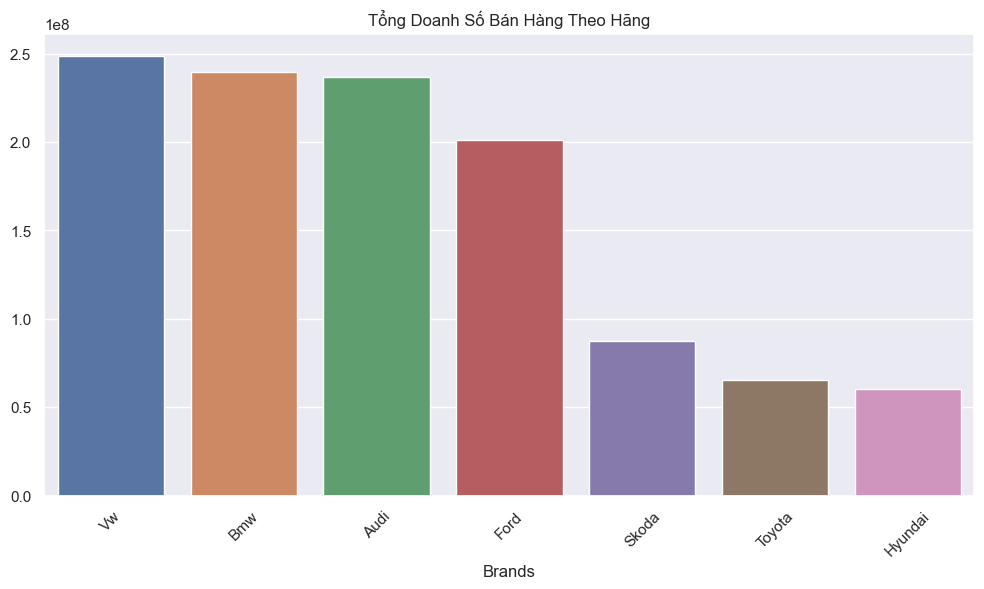

In [28]:
# Biểu đồ Phân Tích Tình Hình Kinh Doanh của Các Hãng Xe
total_sales_by_brand = df.groupby('Brands')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_brand.index, y=total_sales_by_brand.values)
plt.xticks(rotation=45)
plt.title("Tổng Doanh Số Bán Hàng Theo Hãng")
plt.show()


<AxesSubplot:xlabel='transmission', ylabel='count'>

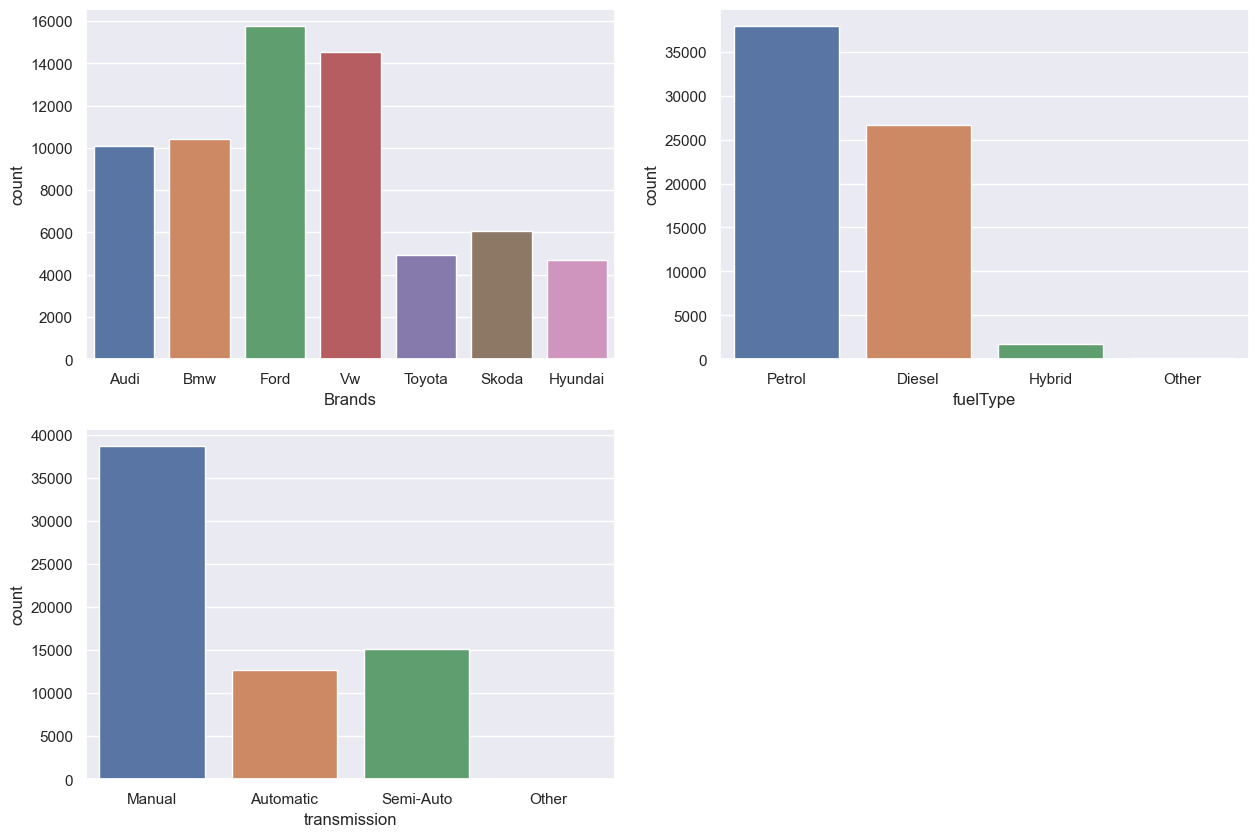

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Brands', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'fuelType', data = df)
plt.subplot(2,2,3)
sns.countplot(x = 'transmission', data = df)

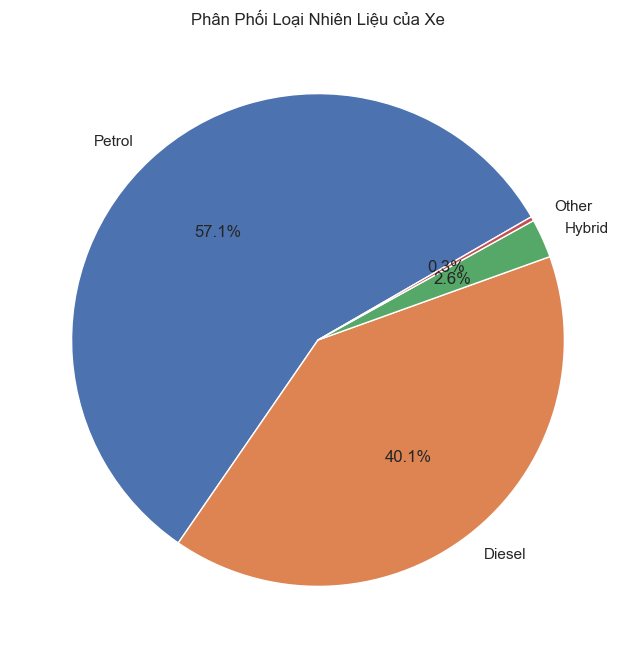

In [30]:
# Biểu đồ tròn cho số lượng xe theo loại nhiên liệu
plt.figure(figsize=(8, 8))
fuel_type_counts = df['fuelType'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=30)
plt.title('Phân Phối Loại Nhiên Liệu của Xe')
plt.show()

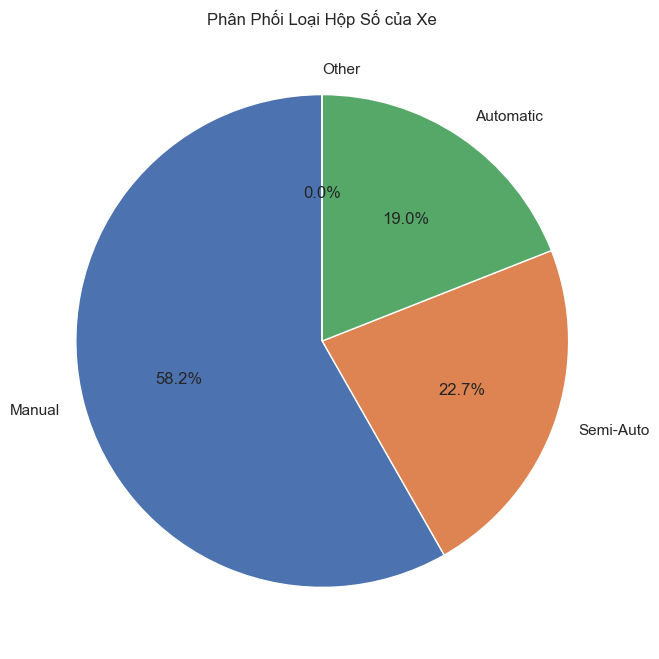

In [31]:
# Biểu đồ tròn cho số lượng xe theo loại hộp số
plt.figure(figsize=(8, 8))
transmission_counts = df['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân Phối Loại Hộp Số của Xe')
plt.show()


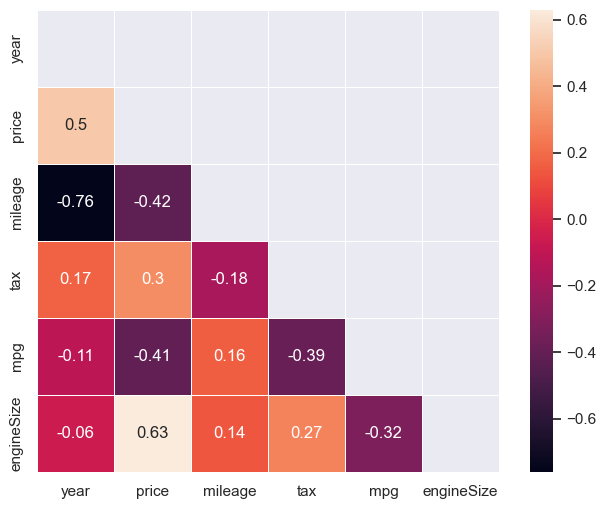

In [32]:
plt.figure(figsize=(8, 6))
correlations = df.corr().round(2)
mask = np.triu(np.ones_like(correlations))
sns.heatmap(data=correlations, mask=mask, square=True, linewidths=0.5, annot=True)
plt.show()

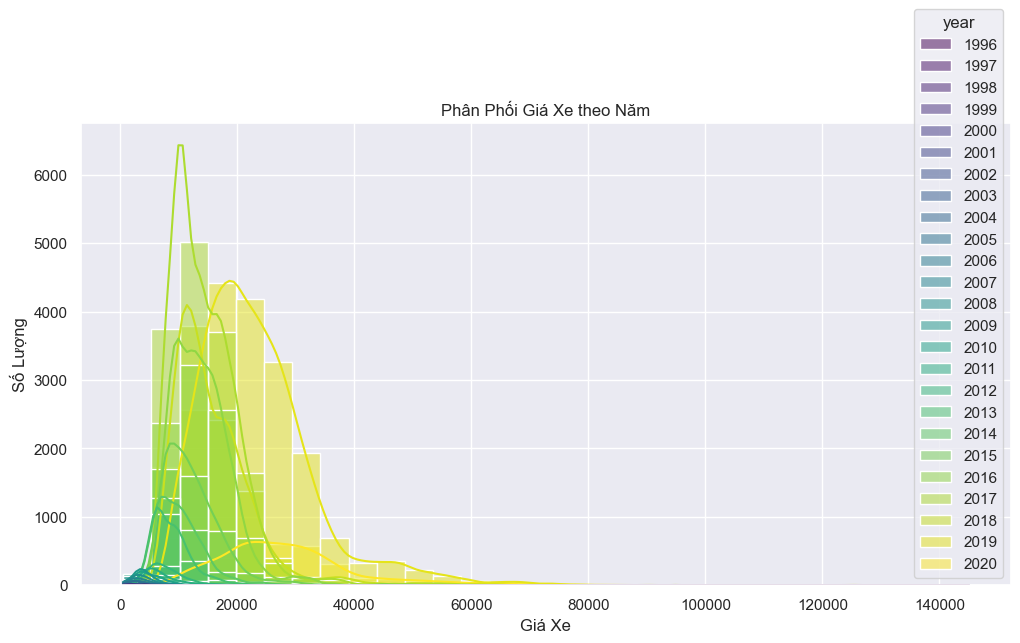

In [33]:
# Biểu đồ Phân Tích Phân Phối Giá Xe Theo Năm
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='year', kde=True, bins=30, common_norm=False, palette='viridis')
plt.title("Phân Phối Giá Xe theo Năm")
plt.xlabel("Giá Xe")
plt.ylabel("Số Lượng")
plt.show()


<AxesSubplot:xlabel='year', ylabel='price'>

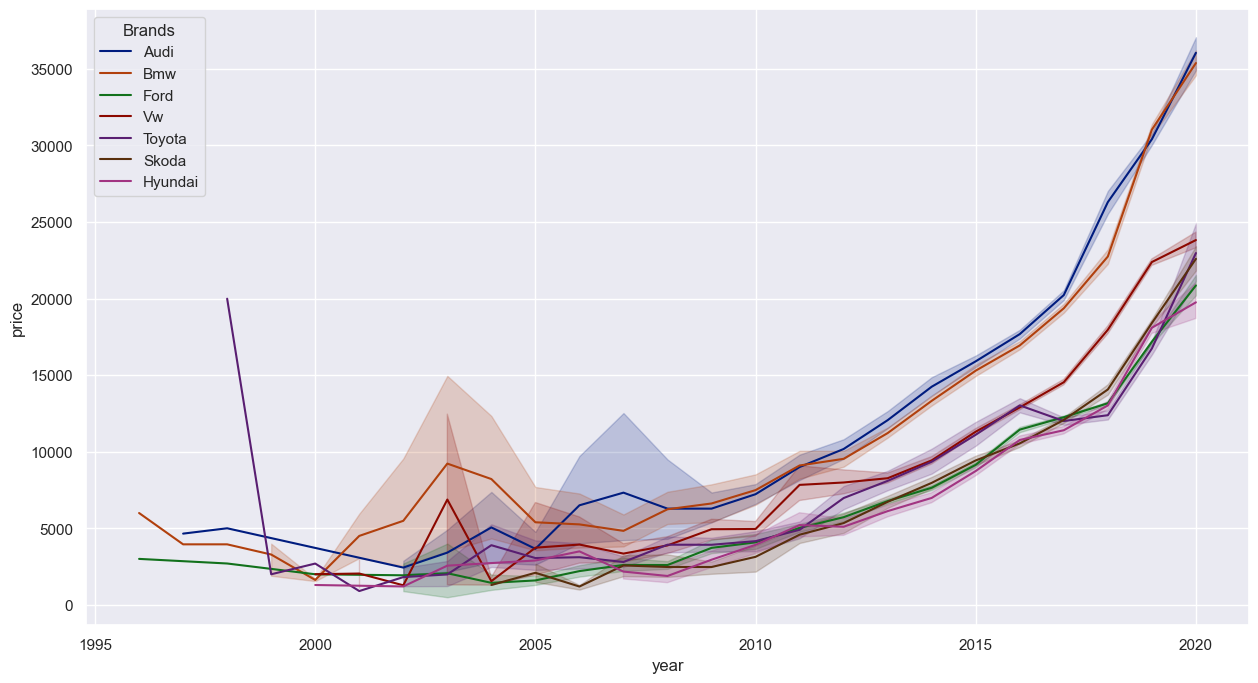

In [40]:
plt.figure(figsize = (15,8))
sns.lineplot( y ='price',x = 'year', data = df, hue = 'Brands',palette = 'dark' )

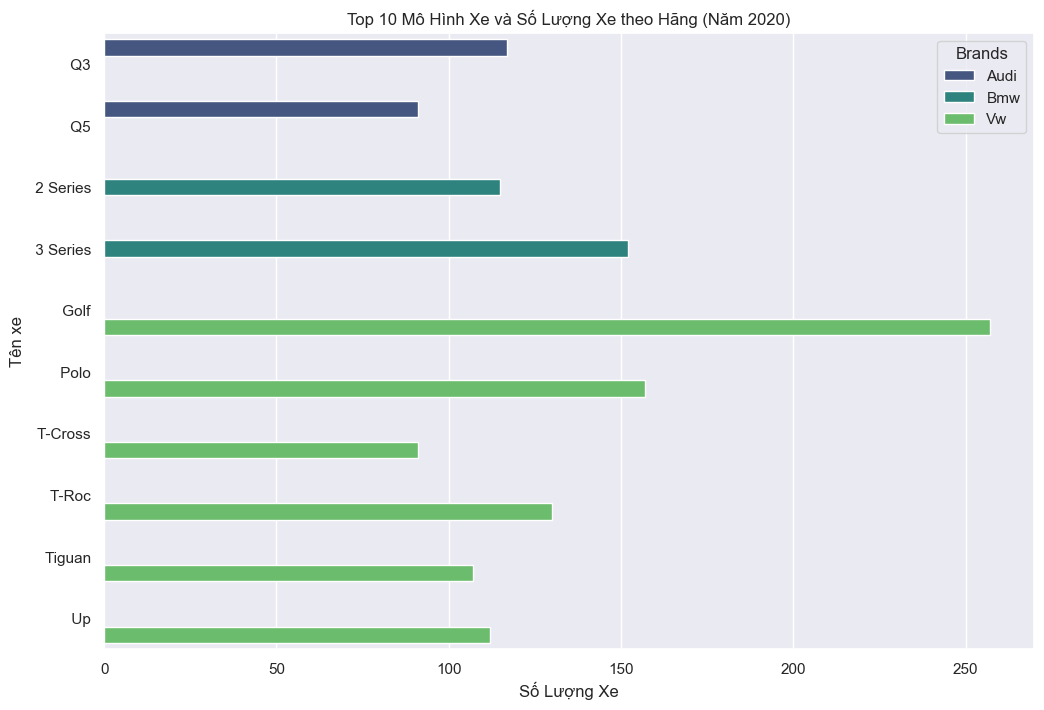

In [35]:
# Lấy top 10 mô hình xe
top_10_models = car_counts_2020.groupby('model')['Count'].sum().nlargest(10).index
car_counts_top_10 = car_counts_2020[car_counts_2020['model'].isin(top_10_models)]

# Vẽ biểu đồ cột ngang của các hãng xe theo năm 2020
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='model', hue='Brands', data=car_counts_top_10, palette='viridis', orient='h')
plt.title('Top 10 Mô Hình Xe và Số Lượng Xe theo Hãng (Năm 2020)')
plt.xlabel('Số Lượng Xe')
plt.ylabel('Tên xe')
plt.show()

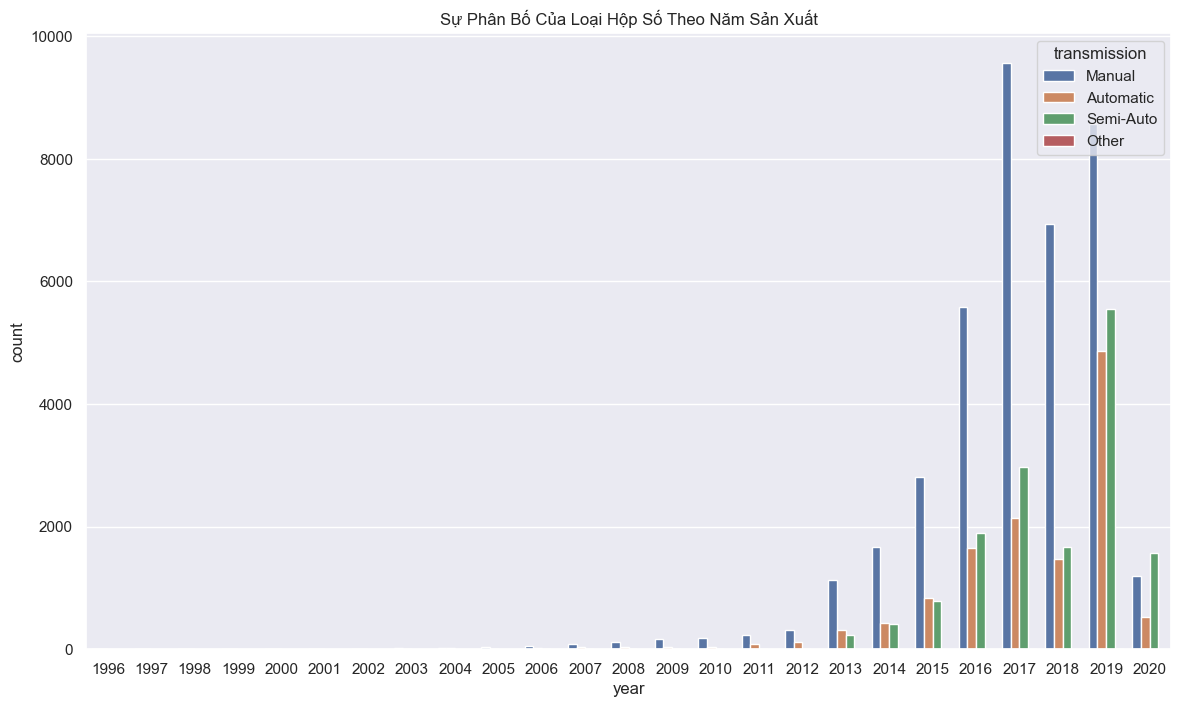

In [36]:
# Biểu đồ Phân Tích Đặc Điểm của Xe theo Năm Sản Xuất
plt.figure(figsize=(14, 8))
sns.countplot(x='year', hue='transmission', data=df)
plt.title("Sự Phân Bố Của Loại Hộp Số Theo Năm Sản Xuất")
plt.show()


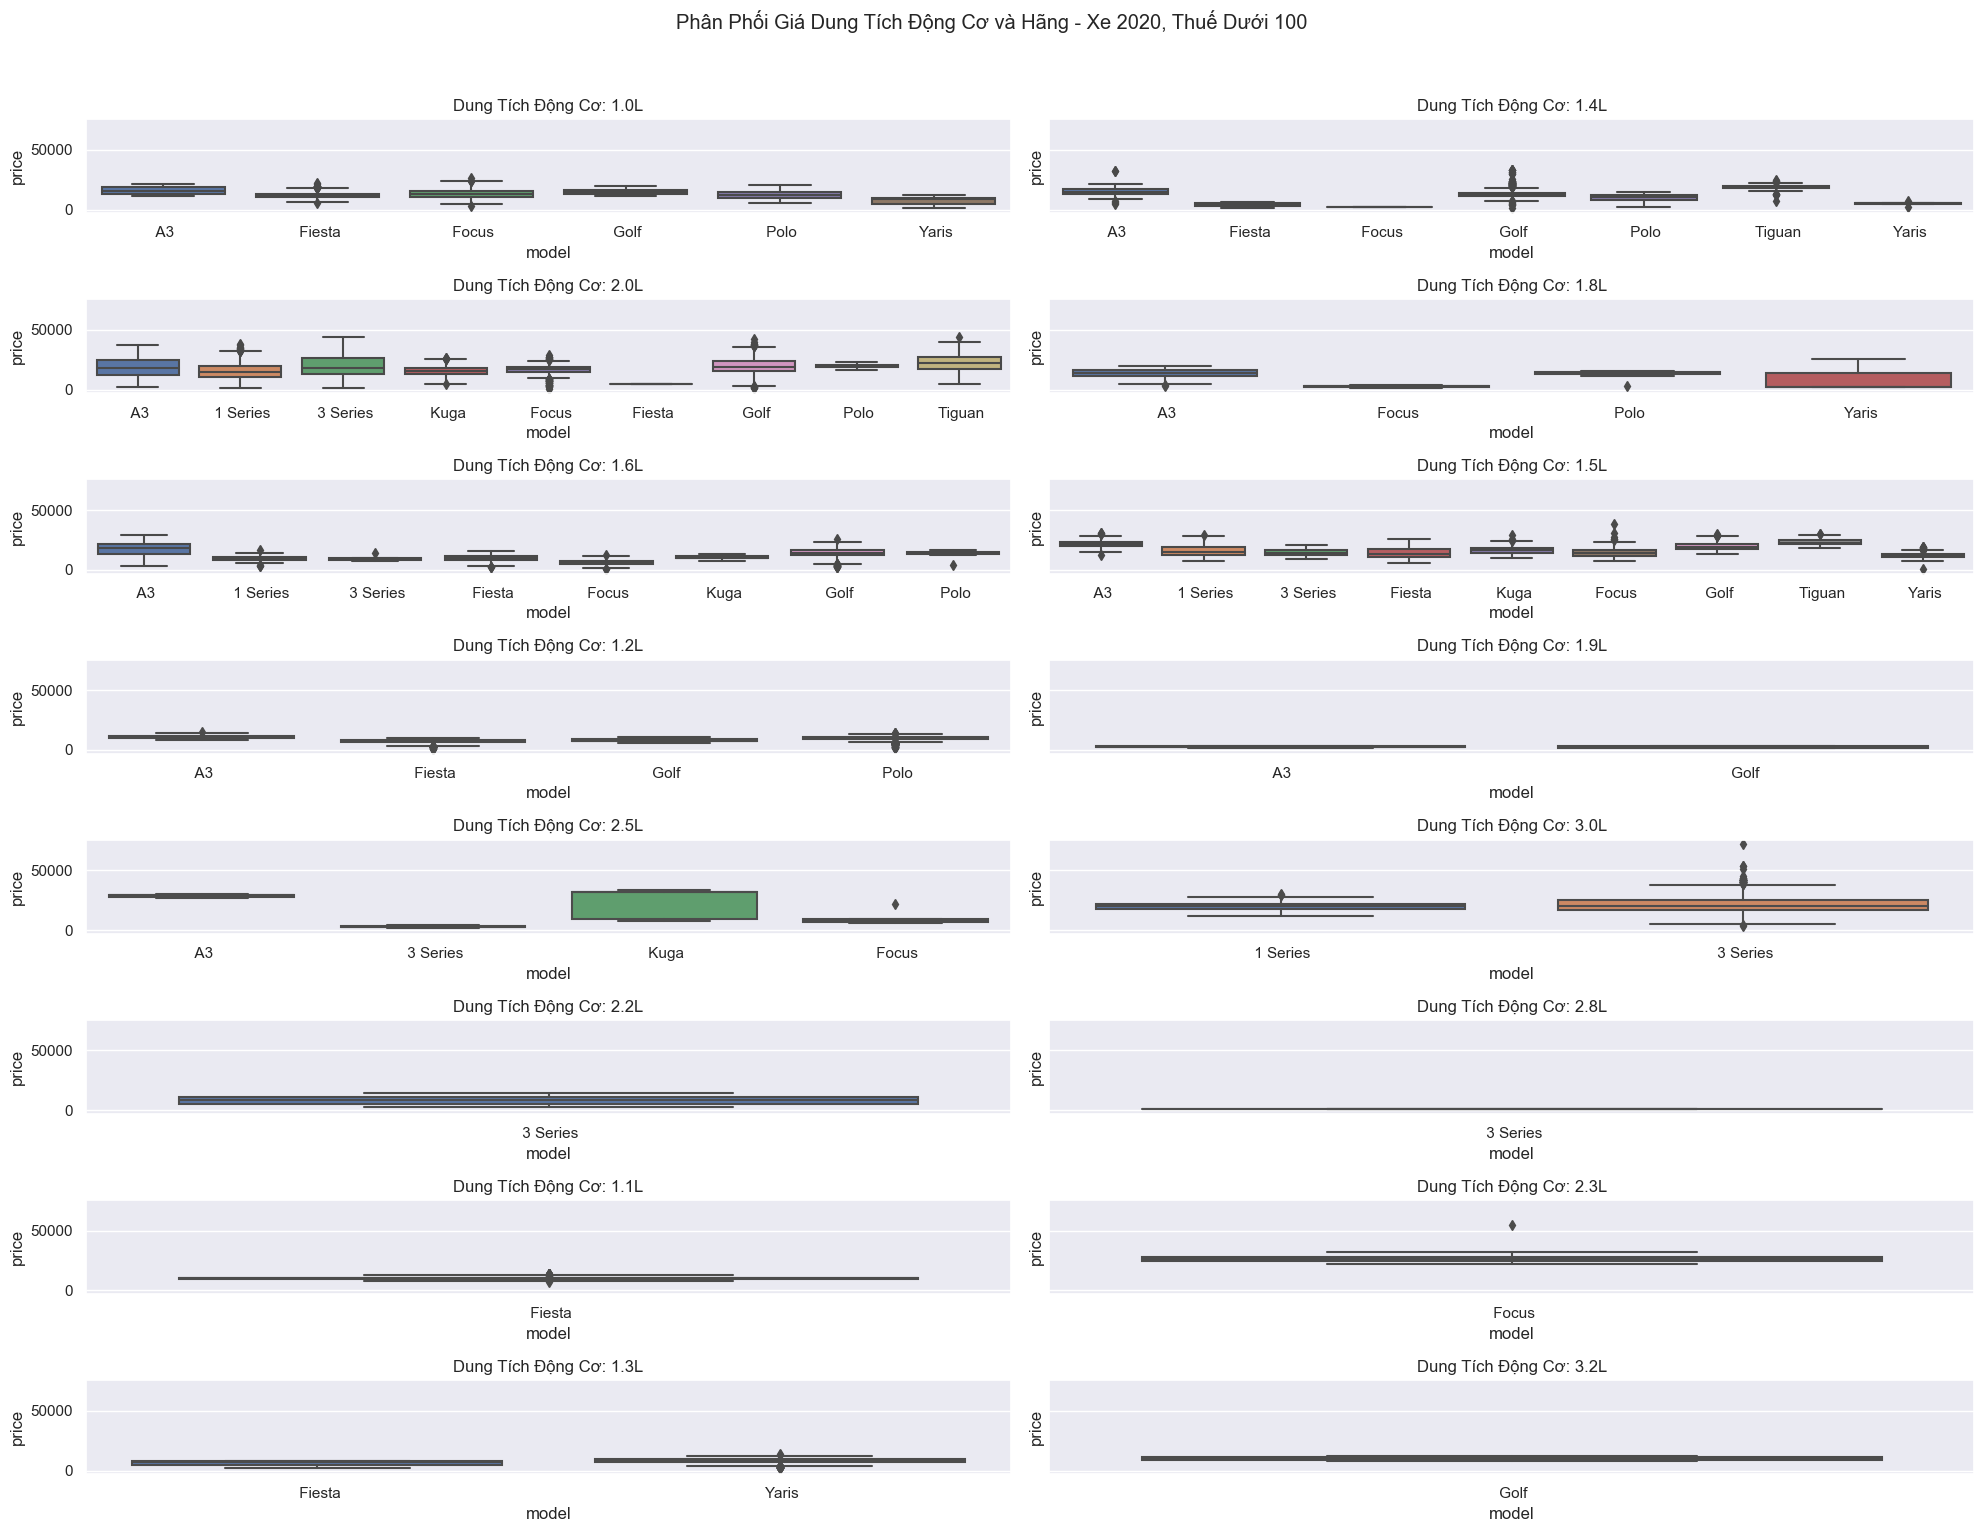

In [37]:
# Biểu đồ Phân Tích Đặc Điểm của Xe theo Dung Tích Động Cơ
#cars_2020_low_tax = df[(df['year'] == 2020) & (df['tax'] > 100)]
#plt.figure(figsize=(15, 8))
#sns.boxplot(x='model', y='price', hue='engineSize', data=cars_2020_low_tax)
#plt.xticks(rotation=45)
#plt.title("Phân Phối Giá Theo Mô Hình và Dung Tích Động Cơ - Xe 2020, Thuế Dưới 100")
#plt.show()
# Chọn Top 10 mô hình xe
top_n_models = df['model'].value_counts().nlargest(10).index
df_top_10_models = df[df['model'].isin(top_n_models)]

# Chia thành nhiều biểu đồ nhỏ
num_rows = (len(df_top_10_models['engineSize'].unique()) + 1) // 2  # Tăng thêm 1 để đảm bảo không có hàng rỗng
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15), sharey=True)

for i, engine_size in enumerate(df_top_10_models['engineSize'].unique()):
    data_subset = df_top_10_models[df_top_10_models['engineSize'] == engine_size]
    sns.boxplot(x='model', y='price', data=data_subset, ax=axes[i//num_cols, i%num_cols])
    axes[i//num_cols, i%num_cols].set_title(f'Dung Tích Động Cơ: {engine_size}L')

plt.suptitle("Phân Phối Giá Dung Tích Động Cơ và Hãng - Xe 2020, Thuế Dưới 100", y=1.02)
plt.tight_layout()
plt.show()


Mean Squared Error: 27373251.789450202
R-squared: 0.6753714832712701
Hệ số: [-2.31364397e-01  1.18412546e+04]
Chặn: 2566.530017364934


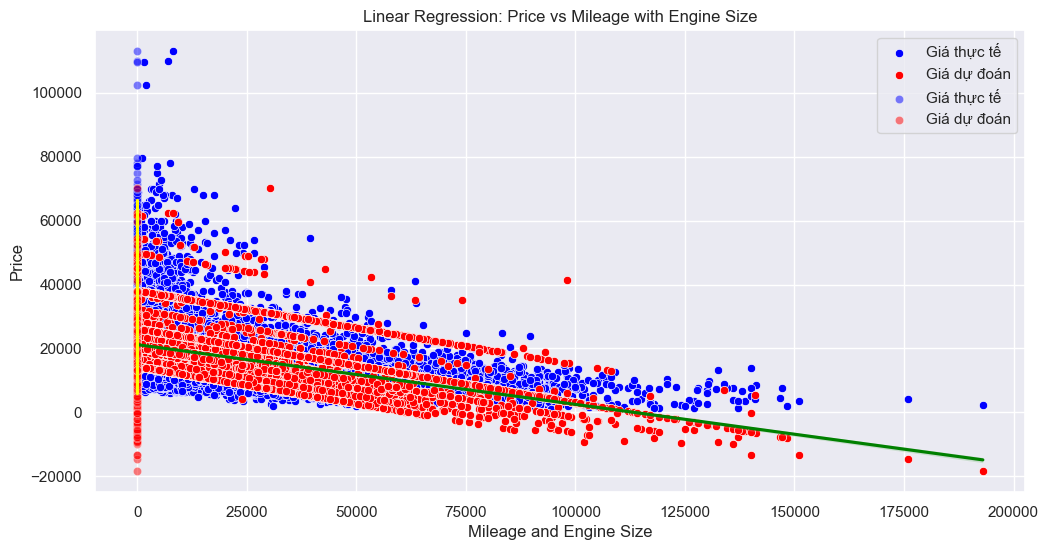

In [38]:
# Lấy dữ liệu

X = df[['mileage', 'engineSize']]  # Sử dụng hai biến độc lập
y = df['price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=0)

# Chuẩn hóa dữ liệu
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)
# Dự đoán giá trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# In các hệ số và chặn của đường hồi quy
print('Hệ số:', model.coef_)
print('Chặn:', model.intercept_)


# Assuming X_test is a DataFrame with columns 'mileage' and 'engineSize'
plt.figure(figsize=(12, 6))

# Scatter plot for 'mileage'
sns.scatterplot(x=X_test['mileage'], y=y_test, color='blue', label='Giá thực tế')
sns.scatterplot(x=X_test['mileage'], y=y_pred, color='red', label='Giá dự đoán')

# Scatter plot for 'engineSize'
sns.scatterplot(x=X_test['engineSize'], y=y_test, color='blue', label='Giá thực tế', alpha=0.5)  # Using alpha to make points semi-transparent
sns.scatterplot(x=X_test['engineSize'], y=y_pred, color='red', label='Giá dự đoán', alpha=0.5)

# Regression plot for both 'mileage' and 'engineSize'
sns.regplot(x=X_test['mileage'], y=y_pred, scatter=False, color='green', line_kws={'label': 'Đường hồi quy'})
sns.regplot(x=X_test['engineSize'], y=y_pred, scatter=False, color='yellow')

plt.xlabel('Mileage and Engine Size')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Mileage with Engine Size')
plt.legend()
plt.show()


Mean Squared Error (XGBoost): 19540379.097393546
R-squared (XGBoost): 0.7773902475047598


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


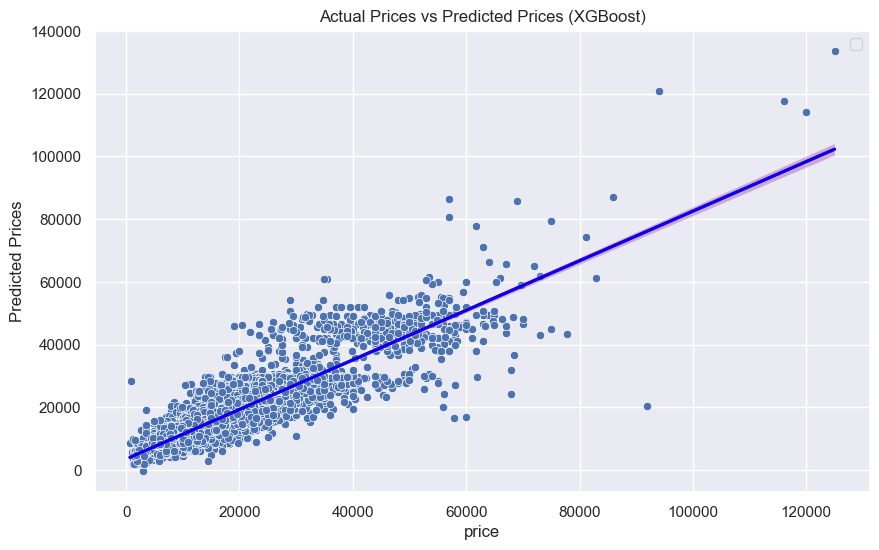

In [39]:
from xgboost import XGBRegressor
X = df[['mileage', 'engineSize']]
y = df['price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred_xgb = model_xgb.predict(X_test)

# Đánh giá hiệu suất mô hình
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

# Vẽ biểu đồ scatter giữa giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
sns.regplot(x=y_test, y=y_pred_xgb, scatter=False, color='red', line_kws={'label': 'Regression Line (XGBoost)'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (XGBoost)')

# Thêm đường hồi quy với màu khác nhau
sns.regplot(x=y_test, y=y_pred_xgb, scatter=False, color='blue', line_kws={'label': 'New Regression Line (XGBoost)'})
plt.legend()

plt.show()